In [1]:
import pandas as pd
import pickle

import seaborn as sns

In [2]:
with open('/home/ProjectFolder/Purchase_Behavior/1_files/output/ContactKeysInfo.pickle', 'rb') as pkl_data:
    df_full = pickle.load(pkl_data)
df = df_full.sample(n=1000000, random_state=42)

In [4]:
pd.read_csv('/home/ProjectFolder/Purchase_Behavior/ContactInfo_Description.csv')

,'Col','Description','Table'
0,'Contact Key','Уникальный номер',''
1,'Age','Возраст','Service.SA_pt1.pkl'
2,'Email authentication status(Y/N)','Статус e-mail авторизации','Service.SA_pt1.pkl'
3,'Flagship Smartphone Regi Count in SA','(?) количество зарегистрированных устройств в...,'Service.SA_pt1.pkl'
4,'Inactive Term','','Service.SA_pt1.pkl'
5,'Language','(?) Язык в Samsung Account','Service.SA_pt1.pkl'
6,'Last date SApps','Последняя дата использования Samsung Apps','Service.SA_pt2.pkl'
7,'Last date SHealth','Последняя дата использования Samsung Health','Service.SA_pt2.pkl'
8,'Last date SMembers','Последняя дата использования Samsung Members','Service.SA_pt2.pkl'
9,'Last date SPay','Последняя дата использования Samsung Pay','Service.SA_pt2.pkl'


In [38]:
df['Usage period of last regi device'].value_counts().head(10)

3.0     37998
15.0    29077
7.0     28560
8.0     26937
6.0     26144
5.0     25834
9.0     25393
27.0    24748
4.0     23478
19.0    22795
Name: Usage period of last regi device, dtype: int64

In [11]:
df['Language'].value_counts().head(10)

ru-RU    986731
en-RU      7073
uz-RU      1250
zh-RU       823
ko-RU       783
tr-RU       598
az-RU       378
ar-RU       366
fr-RU       338
es-RU       264
Name: Language, dtype: int64

In [39]:
df['Age'].mean()

33.269372

In [10]:
df['Gender'].value_counts().head(10)

1.0    425021
2.0    412412
0.0       480
Name: Gender, dtype: int64

In [9]:
df['Flagship Smartphone Regi Count in SA'].value_counts().head(10)

0.0    716354
1.0    225712
2.0     40503
3.0     10591
4.0      3559
5.0      1501
6.0       698
7.0       388
8.0       201
9.0       117
Name: Flagship Smartphone Regi Count in SA, dtype: int64

/home/nmilovidov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/nmilovidov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


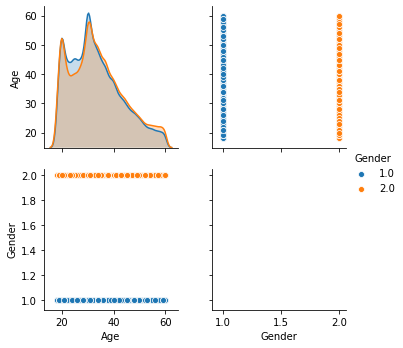

In [17]:
sns.pairplot(df[['Age', 'Gender']][df['Gender'] != 0], hue='Gender', diag_kind='kde')

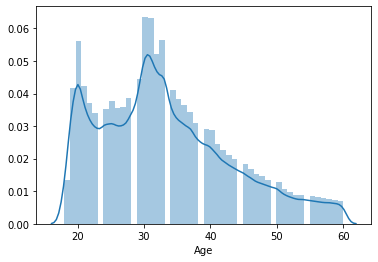

In [14]:
sns.distplot(df['Age'])

In [30]:
# % from count of Flagship devices in Gender groups
df_fil = df[(df['Flagship Smartphone Regi Count in SA']<5) & (df['Gender'] != 0)]

pd.crosstab(df_fil['Gender'], 
            df_fil['Flagship Smartphone Regi Count in SA'],
            normalize=True)

Flagship Smartphone Regi Count in SA,0.0,1.0,2.0,3.0,4.0
Gender,,,,,
1.0,0.340760,0.128958,0.026164,0.007730,0.002816
2.0,0.362846,0.107854,0.017892,0.003872,0.001109


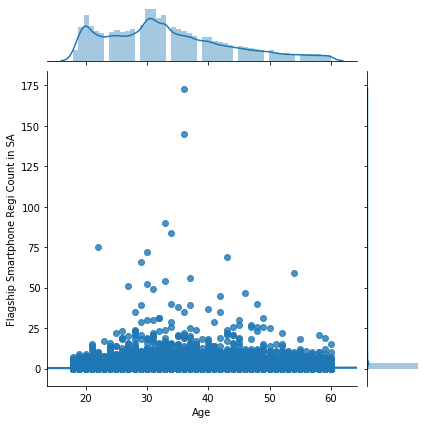

In [44]:
sns.jointplot("Age", "Flagship Smartphone Regi Count in SA", data=df, kind="reg")

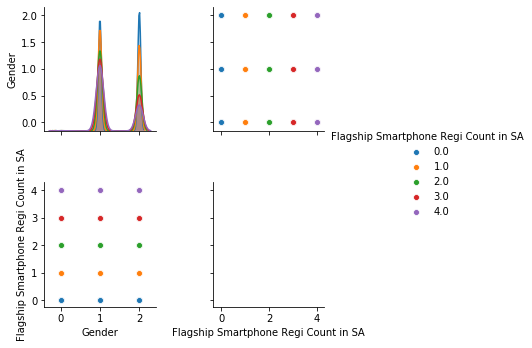

In [40]:
sns.pairplot(df[['Gender', 'Flagship Smartphone Regi Count in SA']][df['Flagship Smartphone Regi Count in SA']<5], hue='Flagship Smartphone Regi Count in SA', diag_kind='kde')

In [31]:
# % from count of paid Apps devices in Gender groups
df_fil = df[(df['Service (Apps) - the count of download (paid)']<5) & (df['Gender'] != 0)]

pd.crosstab(df_fil['Gender'], 
            df_fil['Service (Apps) - the count of download (paid)'],
            normalize=True)

Service (Apps) - the count of download (paid),0.0,1.0,2.0,3.0,4.0
Gender,,,,,
1.0,0.503835,0.002438,0.000725,0.000308,0.000152
2.0,0.490495,0.001450,0.000375,0.000136,0.000085


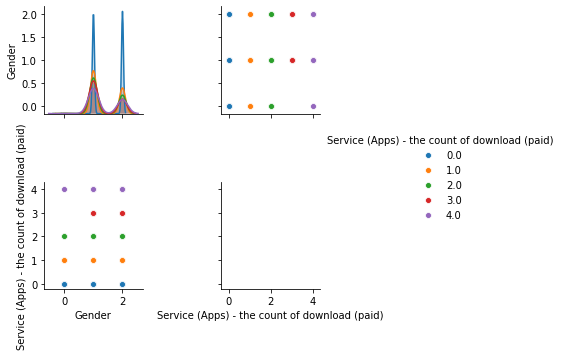

In [41]:
sns.pairplot(df[['Gender', 'Service (Apps) - the count of download (paid)']][df['Service (Apps) - the count of download (paid)']<5], hue='Service (Apps) - the count of download (paid)', diag_kind='kde')

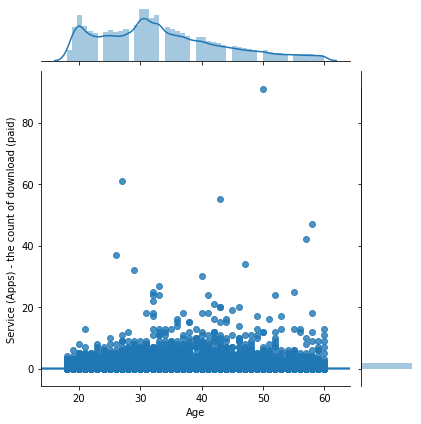

In [43]:
sns.jointplot("Age", "Service (Apps) - the count of download (paid)", data=df, kind="reg")

In [32]:
# % from count of free Apps devices in Gender groups
df_fil = df[(df['Service (Apps) - the count of download (free)']<5) & (df['Gender'] != 0)]

pd.crosstab(df_fil['Gender'], 
            df_fil['Service (Apps) - the count of download (free)'],
            normalize=True)

Service (Apps) - the count of download (free),0.0,1.0,2.0,3.0,4.0
Gender,,,,,
1.0,0.444575,0.032954,0.016213,0.010262,0.007006
2.0,0.421235,0.033616,0.015941,0.010821,0.007377


In [14]:
df['Service (Apps) - the count of download (free)'].value_counts().head(10)

0.0    819119
1.0     62055
2.0     29825
3.0     19516
4.0     13303
5.0      9839
6.0      7448
7.0      5699
8.0      4586
9.0      3668
Name: Service (Apps) - the count of download (free), dtype: int64

In [15]:
df['Service (Apps) - the count of download (paid)'].value_counts().head(10)

0.0    994383
1.0      3608
2.0      1001
3.0       402
4.0       212
5.0       110
6.0        73
7.0        54
8.0        35
9.0        27
Name: Service (Apps) - the count of download (paid), dtype: int64

In [16]:
df['Service (Apps) - the count of download (total)'].value_counts().head(10)

0.0    818143
1.0     62107
2.0     29913
3.0     19578
4.0     13473
5.0      9907
6.0      7497
7.0      5806
8.0      4636
9.0      3703
Name: Service (Apps) - the count of download (total), dtype: int64

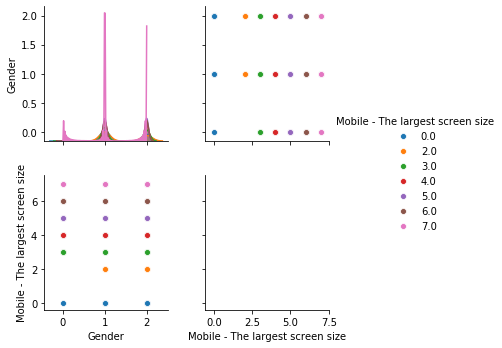

In [45]:
sns.pairplot(df[['Gender', 'Mobile - The largest screen size']], hue='Mobile - The largest screen size', diag_kind='kde')

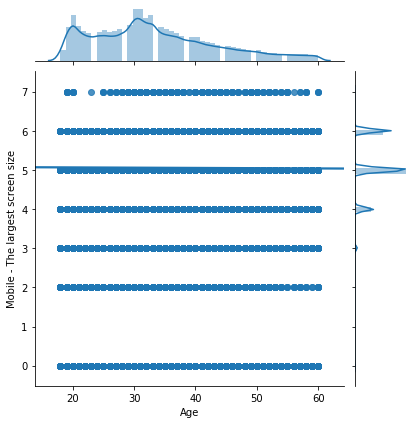

In [46]:
sns.jointplot("Age", "Mobile - The largest screen size", data=df, kind="reg")

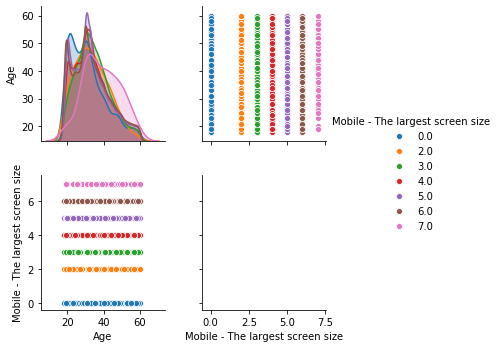

In [47]:
sns.pairplot(df[['Age', 'Mobile - The largest screen size']], hue='Mobile - The largest screen size', diag_kind='kde')

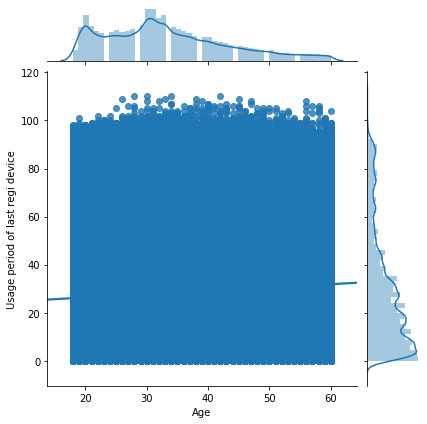

In [48]:

sns.jointplot("Age", "Usage period of last regi device", data=df, kind="reg")

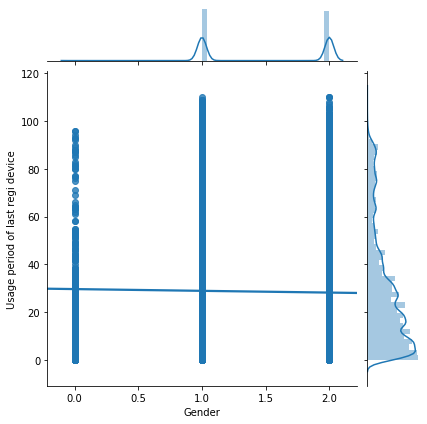

In [49]:
sns.jointplot("Gender", "Usage period of last regi device", data=df, kind="reg")